## Analyse Exploratoire du Dataset

In [1]:
# Imports
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ydata_profiling import ProfileReport

from src.etl import DataLoader

# Configuration des graphiques
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
%matplotlib inline

DATA_FOLDER = Path("../artifacts/data")

print("✅ Imports réussis")

✅ Imports réussis


### 1. Chargement des Données

In [2]:
data_path = DATA_FOLDER / "raw/stores_sales_forecasting.csv"
loader = DataLoader(str(data_path))
df_sales = loader.load_data()

# Informations de base
info = loader.get_basic_info()
print("Dataset chargé:")
print(f"  - Lignes: {info['n_lignes']:,}")
print(f"  - Colonnes: {info['n_colonnes']}")
print(f"  - Mémoire: {info['memoire_mb']:.2f} MB")

# Aperçu
print("\n5 premières lignes:")
df_sales.head()

INFO:src.etl.load:Chargement des données depuis ../artifacts/data/raw/stores_sales_forecasting.csv
INFO:src.etl.load:Données chargées avec encoding latin-1: 2121 lignes, 21 colonnes


Dataset chargé:
  - Lignes: 2,121
  - Colonnes: 21
  - Mémoire: 1.96 MB

5 premières lignes:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [14]:
df_sales["Row ID"].to_list()[:5]

[1, 2, 4, 6, 11]

### 2. EDA

Génération d'un rapport complet et interactif pour identifier automatiquement:
- Statistiques descriptives
- Distributions
- Corrélations
- Valeurs manquantes
- Outliers
- Alertes de qualité

In [3]:
# Générer le rapport ydata-profiling
profile = ProfileReport(
    df_sales,
    title="Analyse Exploratoire - Données de Ventes",
    explorative=True,
)

report_path = DATA_FOLDER / "raw/eda_report.html"
profile.to_file(report_path)

print(f"\n✅ Rapport sauvegardé: {report_path}. Peut être ouvert dans un navigateur.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 204362.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


✅ Rapport sauvegardé: ../artifacts/data/raw/eda_report.html. Peut être ouvert dans un navigateur.


In [ ]:
# run pour ouvrir le rapport ici, sinon ouvrir le fichier HTML dans un navigateur
profile.to_notebook_iframe()

In [5]:
# statistics
df_sales.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
90%,8990.000000,94122.000000,885.528000,7.000000,0.450000,99.230000
95%,9494.000000,98103.000000,1317.492000,8.000000,0.600000,190.429800
99%,9898.800000,98115.000000,2566.883200,11.000000,0.600000,401.311080


In [6]:
df_sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Variables continues à analyser: ['Sales', 'Quantity', 'Discount', 'Profit']
Variables catégorielles pour groupement: ['Segment', 'Ship Mode', 'State', 'Region']


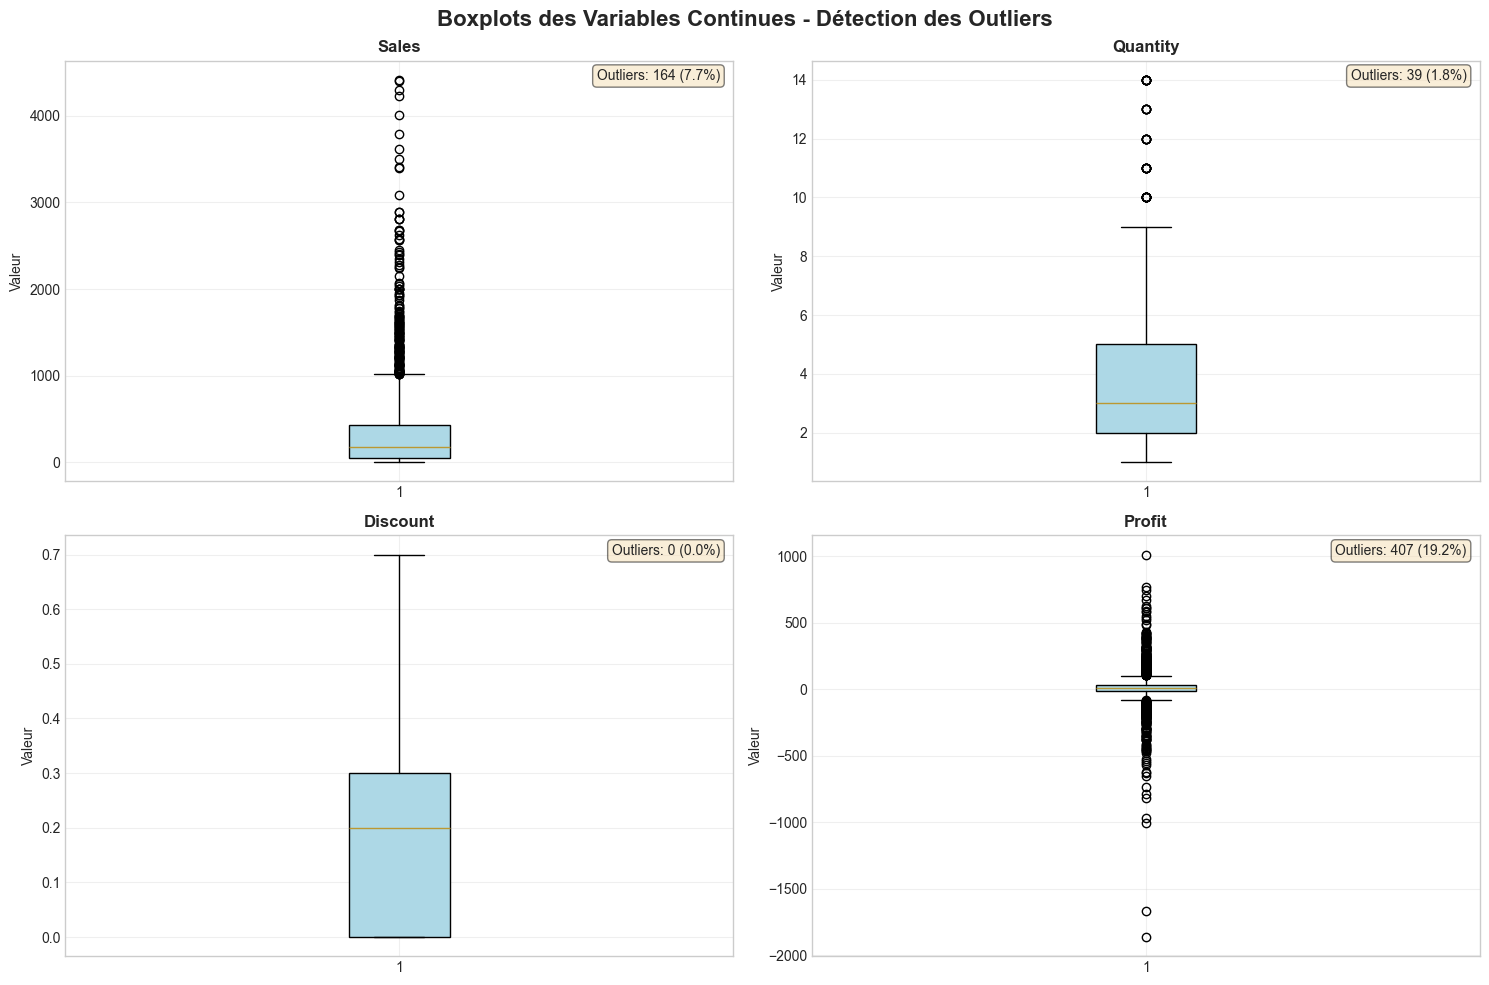

/var/folders/0h/w1bz5ccx1bz2wwyw6lynhlwr0000gp/T/ipykernel_7498/3274657822.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/0h/w1bz5ccx1bz2wwyw6lynhlwr0000gp/T/ipykernel_7498/3274657822.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/0h/w1bz5ccx1bz2wwyw6lynhlwr0000gp/T/ipykernel_7498/3274657822.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/0h/w1bz5ccx1bz2wwyw6lynhlwr0000gp/T/

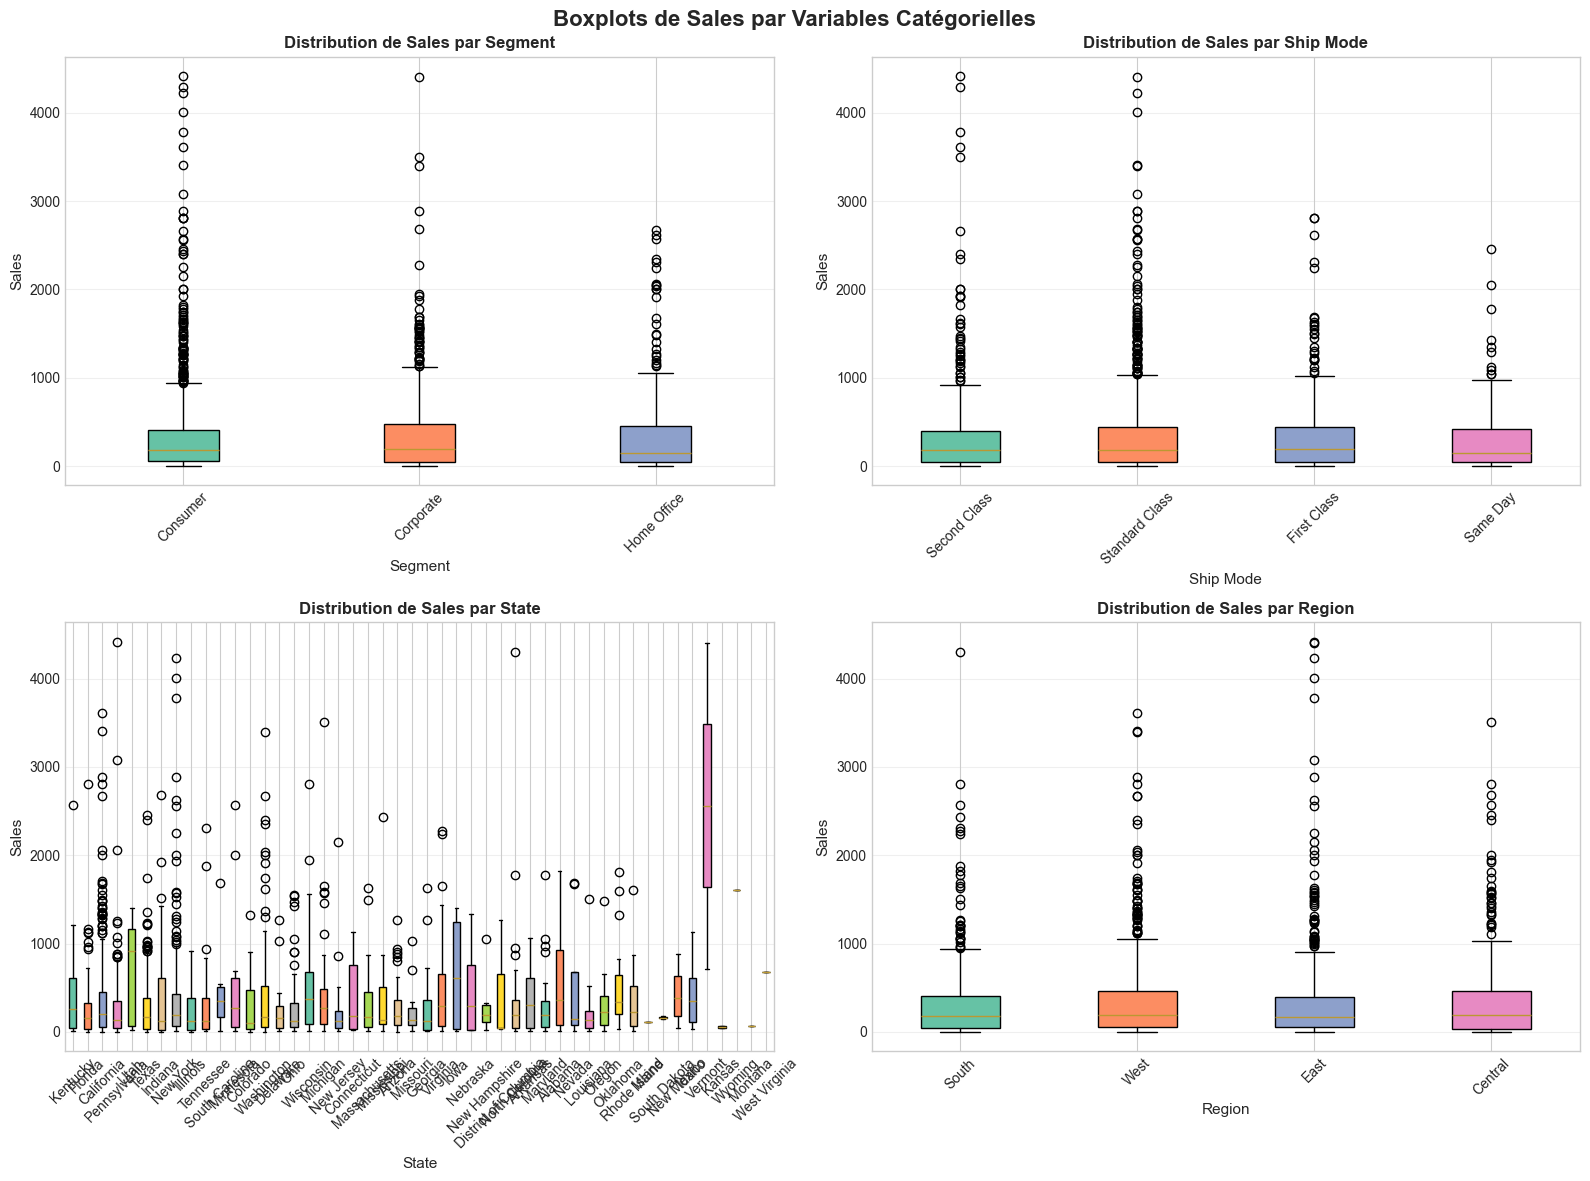


RÉSUMÉ DES OUTLIERS (méthode IQR: Q1-1.5*IQR et Q3+1.5*IQR)
Variable      Q1       Q3      IQR  Lower Bound  Upper Bound  Outliers Bas  Outliers Haut  Total Outliers Pourcentage
   Sales  47.040 435.1680 388.1280    -535.1520      1017.36             0            164             164       7.73%
Quantity   2.000   5.0000   3.0000      -2.5000         9.50             0             39              39       1.84%
Discount   0.000   0.3000   0.3000      -0.4500         0.75             0              0               0       0.00%
  Profit -12.849  33.7266  46.5756     -82.7124       103.59           208            199             407      19.19%


In [7]:
### 3. Analyse des Outliers avec Boxplots

continuous_vars = df_sales.select_dtypes(include=["float64", "int64"]).columns.tolist()
continuous_vars = [col for col in continuous_vars if col not in ["Row ID", "Postal Code"]]

categorical_vars = ["Segment", "Ship Mode", "State", "Region", "Category", "Sub-Category"]

print(f"Variables continues à analyser: {continuous_vars}")
print(f"Variables catégorielles pour groupement: {categorical_vars[:4]}")

# Boxplots pour les variables continues
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    "Boxplots des Variables Continues - Détection des Outliers", fontsize=16, fontweight="bold"
)

for idx, var in enumerate(continuous_vars[:4]):  # Sales, Quantity, Discount, Profit
    ax = axes[idx // 2, idx % 2]
    bp = ax.boxplot(df_sales[var].dropna(), vert=True, patch_artist=True)

    for patch in bp["boxes"]:
        patch.set_facecolor("lightblue")

    ax.set_ylabel("Valeur", fontsize=10)
    ax.set_title(f"{var}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

    Q1 = df_sales[var].quantile(0.25)
    Q3 = df_sales[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_sales[(df_sales[var] < lower_bound) | (df_sales[var] > upper_bound)][var]

    ax.text(
        0.98,
        0.98,
        f"Outliers: {len(outliers)} ({len(outliers) / len(df_sales) * 100:.1f}%)",
        transform=ax.transAxes,
        ha="right",
        va="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Boxplots de Sales par Variables Catégorielles", fontsize=16, fontweight="bold")

for idx, cat_var in enumerate(categorical_vars[:4]):
    ax = axes[idx // 2, idx % 2]

    data_to_plot = [
        df_sales[df_sales[cat_var] == cat]["Sales"].values for cat in df_sales[cat_var].unique()
    ]
    labels = df_sales[cat_var].unique()

    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)

    colors = sns.color_palette("Set2", len(labels))
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)

    ax.set_ylabel("Sales", fontsize=11)
    ax.set_xlabel(cat_var, fontsize=11)
    ax.set_title(f"Distribution de Sales par {cat_var}", fontsize=12, fontweight="bold")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("RÉSUMÉ DES OUTLIERS (méthode IQR: Q1-1.5*IQR et Q3+1.5*IQR)")
print("=" * 80)

outlier_summary = []
for var in continuous_vars[:4]:
    Q1 = df_sales[var].quantile(0.25)
    Q3 = df_sales[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_low = df_sales[df_sales[var] < lower_bound]
    outliers_high = df_sales[df_sales[var] > upper_bound]
    total_outliers = len(outliers_low) + len(outliers_high)

    outlier_summary.append(
        {
            "Variable": var,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers Bas": len(outliers_low),
            "Outliers Haut": len(outliers_high),
            "Total Outliers": total_outliers,
            "Pourcentage": f"{total_outliers / len(df_sales) * 100:.2f}%",
        }
    )

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))
print("=" * 80)

DISTRIBUTION DES VENTES PAR VARIABLE CATÉGORIELLE

📊 SEGMENT
  Catégorie  Nombre de Ventes  Pourcentage (%)
   Consumer              1113            52.48
  Corporate               646            30.46
Home Office               362            17.07
      TOTAL              2121           100.00

Nombre de catégories uniques: 3

📊 SHIP MODE
     Catégorie  Nombre de Ventes  Pourcentage (%)
Standard Class              1248            58.84
  Second Class               427            20.13
   First Class               327            15.42
      Same Day               119             5.61
         TOTAL              2121           100.00

Nombre de catégories uniques: 4

📊 REGION
Catégorie  Nombre de Ventes  Pourcentage (%)
     West               707            33.33
     East               601            28.34
  Central               481            22.68
    South               332            15.65
    TOTAL              2121           100.00

Nombre de catégories uniques: 4

📊 STATE
   

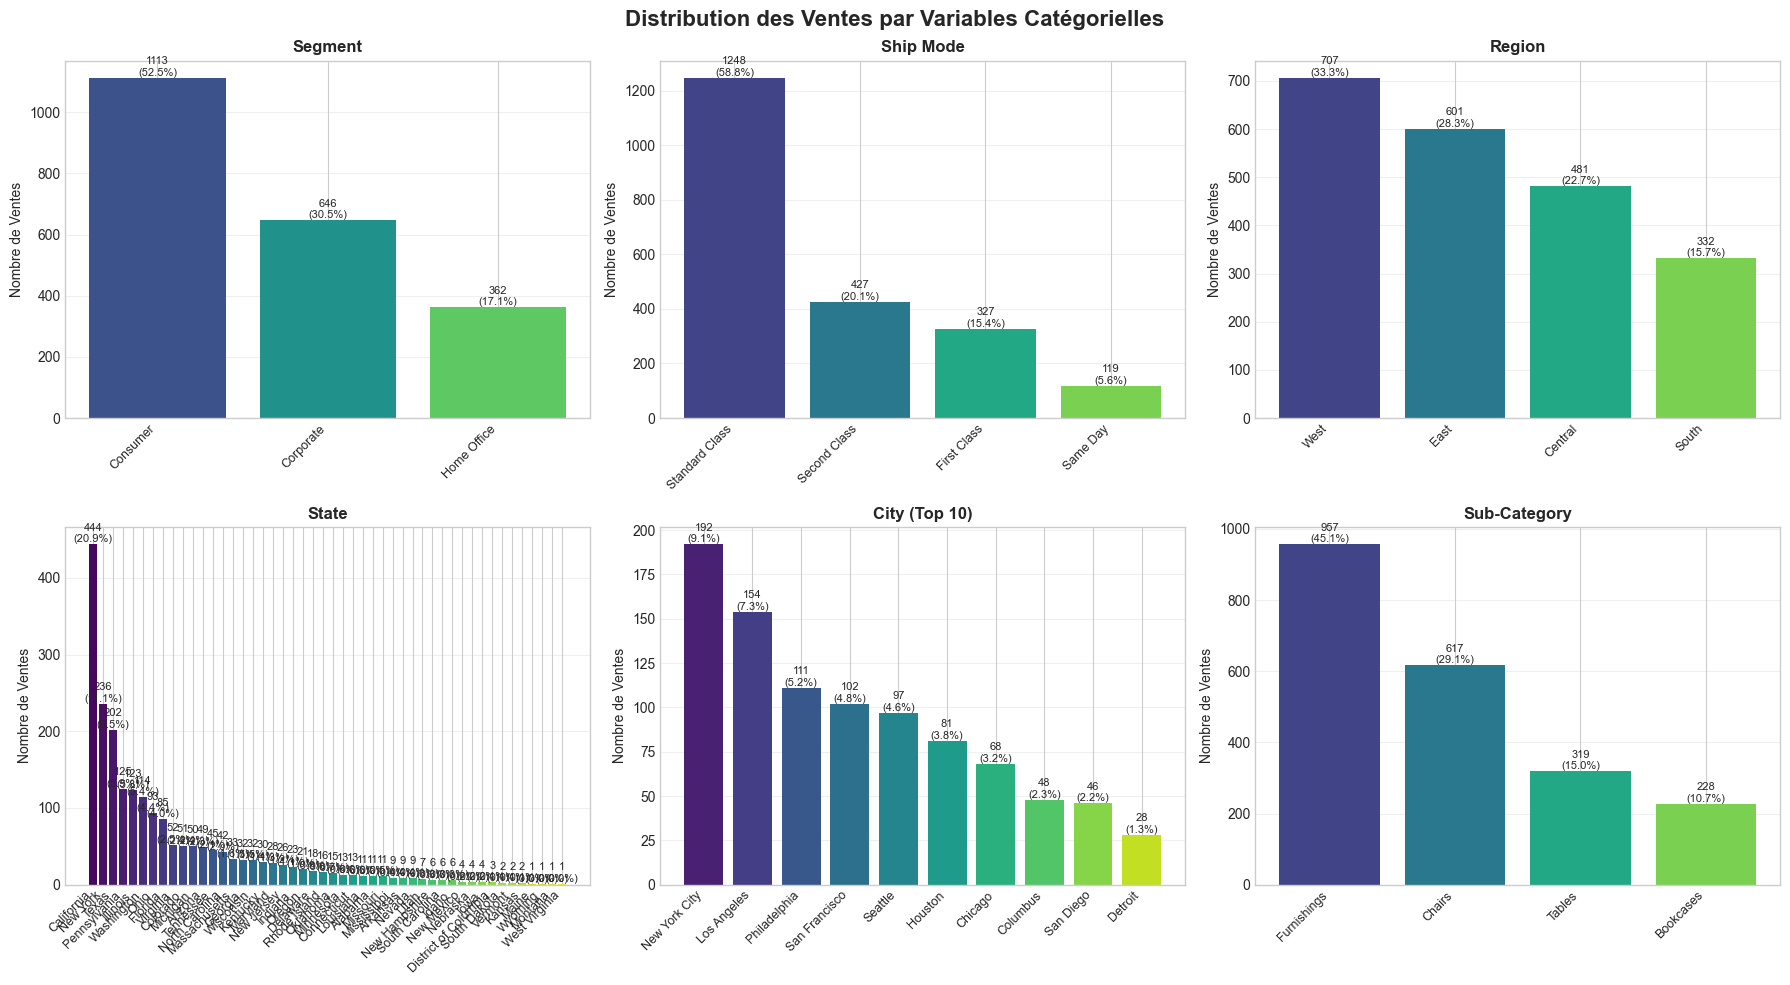


RÉSUMÉ GLOBAL - CARDINALITÉ DES VARIABLES CATÉGORIELLES
    Variable  Valeurs Uniques Catégorie la Plus Fréquente  Nombre Pourcentage (%)
     Segment                3                    Consumer    1113          52.48%
   Ship Mode                4              Standard Class    1248          58.84%
      Region                4                        West     707          33.33%
       State               48                  California     444          20.93%
        City              371               New York City     192           9.05%
Sub-Category                4                 Furnishings     957          45.12%


In [8]:
### 4. Distribution des Ventes par Variables Catégorielles

categorical_fields = ["Segment", "Ship Mode", "Region", "State", "City", "Sub-Category"]

print("=" * 100)
print("DISTRIBUTION DES VENTES PAR VARIABLE CATÉGORIELLE")
print("=" * 100)

for field in categorical_fields:
    print(f"\n{'=' * 100}")
    print(f"📊 {field.upper()}")
    print(f"{'=' * 100}")

    counts = df_sales[field].value_counts()
    percentages = (counts / len(df_sales) * 100).round(2)

    summary_df = pd.DataFrame(
        {
            "Catégorie": counts.index,
            "Nombre de Ventes": counts.values,
            "Pourcentage (%)": percentages.values,
        }
    )

    total_row = pd.DataFrame(
        {"Catégorie": ["TOTAL"], "Nombre de Ventes": [counts.sum()], "Pourcentage (%)": [100.00]}
    )
    summary_df = pd.concat([summary_df, total_row], ignore_index=True)

    print(summary_df.to_string(index=False))
    print(f"\nNombre de catégories uniques: {len(counts)}")

print("\n" + "=" * 100)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribution des Ventes par Variables Catégorielles", fontsize=16, fontweight="bold")

for idx, field in enumerate(categorical_fields):
    ax = axes[idx // 3, idx % 3]

    # Pour City, limiter aux 10 villes les plus fréquentes pour la lisibilité
    if field == "City":
        counts = df_sales[field].value_counts().head(10)
        title_suffix = " (Top 10)"
    else:
        counts = df_sales[field].value_counts()
        title_suffix = ""

    bars = ax.bar(
        range(len(counts)), counts.values, color=sns.color_palette("viridis", len(counts))
    )

    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Nombre de Ventes", fontsize=10)
    ax.set_title(f"{field}{title_suffix}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y")

    for i, (bar, value) in enumerate(zip(bars, counts.values)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(value)}\n({value / len(df_sales) * 100:.1f}%)",
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("RÉSUMÉ GLOBAL - CARDINALITÉ DES VARIABLES CATÉGORIELLES")
print("=" * 100)

cardinality_summary = []
for field in categorical_fields:
    unique_count = df_sales[field].nunique()
    most_common = df_sales[field].value_counts().index[0]
    most_common_count = df_sales[field].value_counts().values[0]
    most_common_pct = most_common_count / len(df_sales) * 100

    cardinality_summary.append(
        {
            "Variable": field,
            "Valeurs Uniques": unique_count,
            "Catégorie la Plus Fréquente": most_common,
            "Nombre": most_common_count,
            "Pourcentage (%)": f"{most_common_pct:.2f}%",
        }
    )

cardinality_df = pd.DataFrame(cardinality_summary)
print(cardinality_df.to_string(index=False))
print("=" * 100)

ANALYSE TEMPORELLE DES VENTES

Période des données: 2014-01-06 à 2017-12-30
Durée totale: 1454 jours


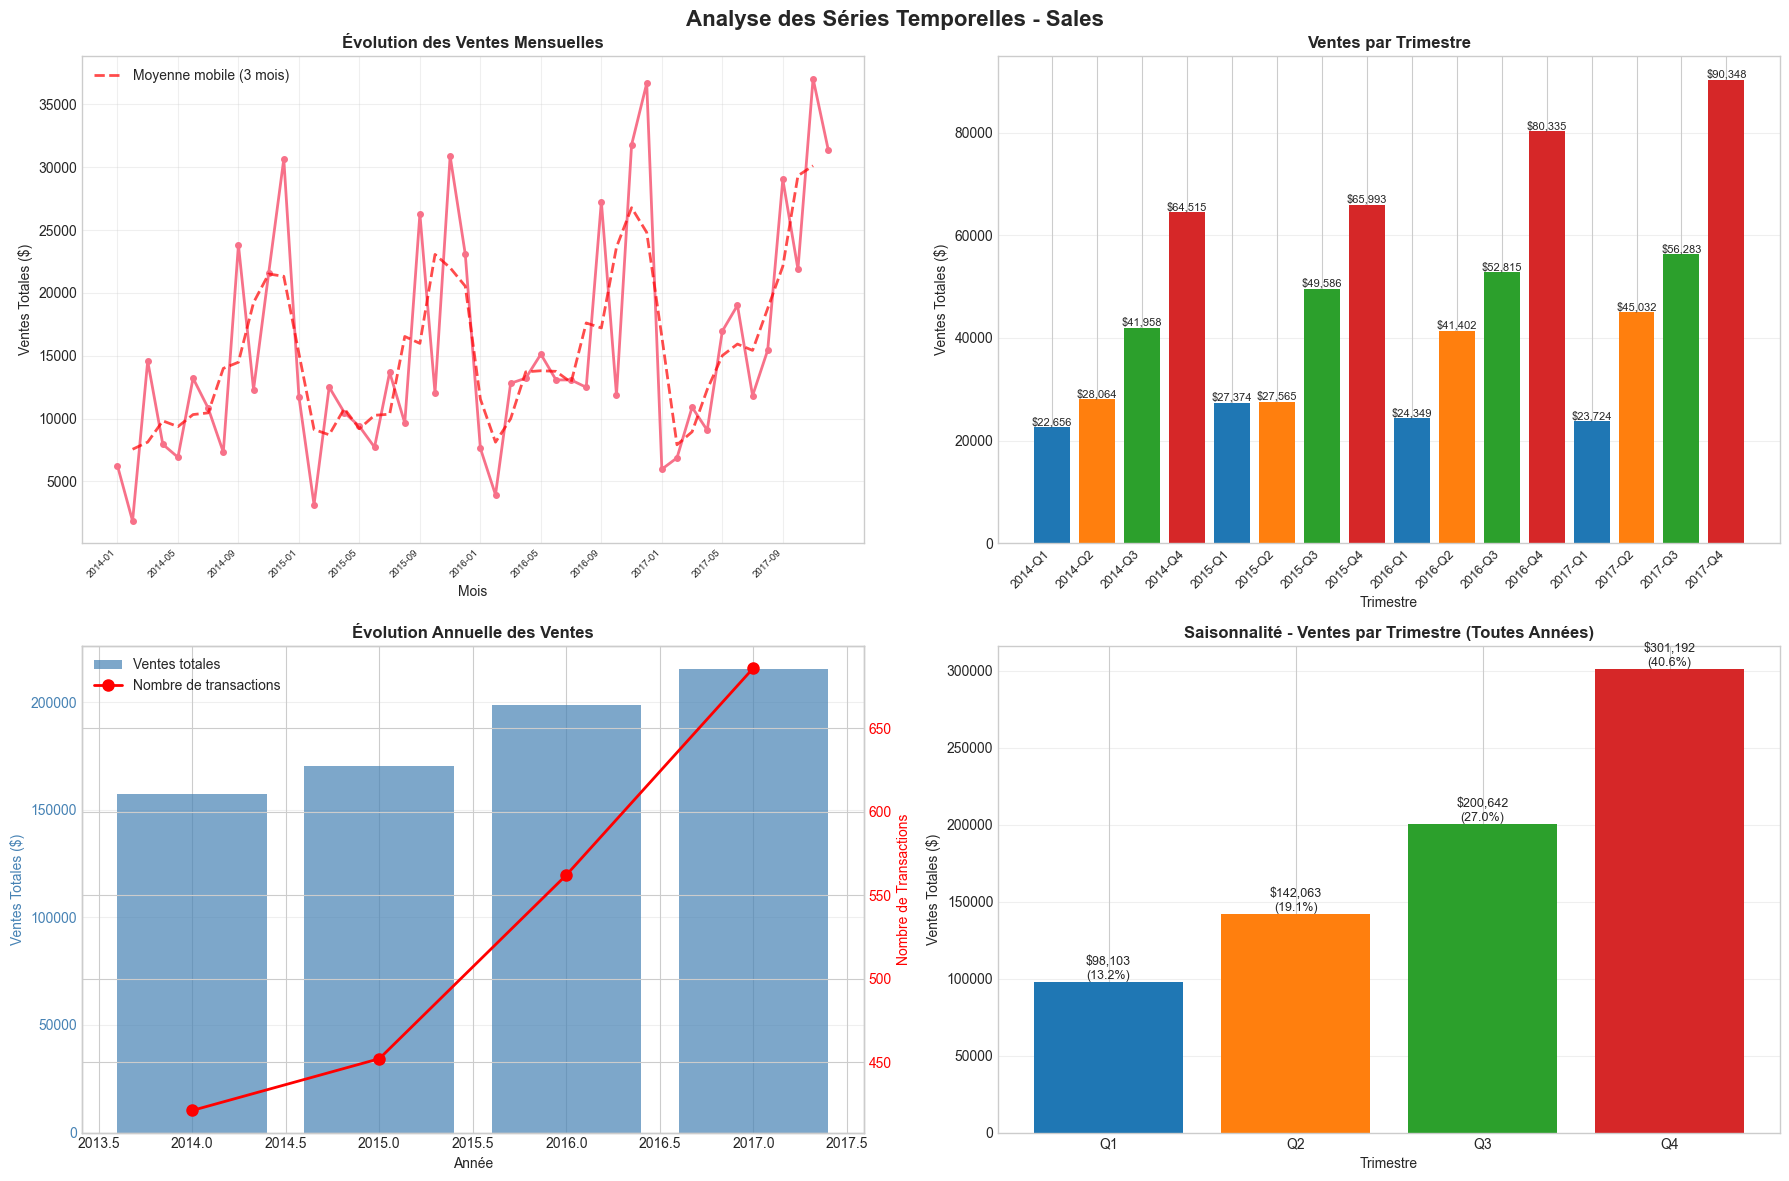


STATISTIQUES TEMPORELLES

📊 Ventes par Année:
      Total ($)  Nombre de Transactions  Vente Moyenne ($)
Year                                                      
2014  157192.85                     421             373.38
2015  170518.24                     452             377.25
2016  198901.44                     562             353.92
2017  215387.27                     686             313.98

📊 Ventes par Trimestre (Agrégé toutes années):
    Total ($)  Nombre de Transactions  Vente Moyenne ($)  Pourcentage (%)
Q1   98103.44                     284             345.43            13.22
Q2  142063.18                     433             328.09            19.15
Q3  200641.65                     570             352.00            27.04
Q4  301191.53                     834             361.14            40.59

🔍 INSIGHTS CLÉS
• Trimestre le plus performant: Q4 ($301,192)
• Trimestre le moins performant: Q1 ($98,103)
• Écart de performance: 207.0% entre le meilleur et le pire trimestre
• 

In [9]:
### 5. Analyse des Séries Temporelles

# Convertir les dates en datetime
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"])
df_sales["Ship Date"] = pd.to_datetime(df_sales["Ship Date"])

# Trier par date pour l'analyse temporelle
df_sorted = df_sales.sort_values("Order Date")

print("=" * 100)
print("ANALYSE TEMPORELLE DES VENTES")
print("=" * 100)
print(
    f"\nPériode des données: {df_sorted['Order Date'].min().date()} à {df_sorted['Order Date'].max().date()}"
)
print(f"Durée totale: {(df_sorted['Order Date'].max() - df_sorted['Order Date'].min()).days} jours")

# Agrégations temporelles
df_sorted["Year"] = df_sorted["Order Date"].dt.year
df_sorted["Quarter"] = df_sorted["Order Date"].dt.quarter
df_sorted["Month"] = df_sorted["Order Date"].dt.to_period("M")
df_sorted["YearMonth"] = df_sorted["Order Date"].dt.to_period("M")

# Créer les visualisations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Analyse des Séries Temporelles - Sales", fontsize=16, fontweight="bold")

# 1. Ventes mensuelles
ax1 = axes[0, 0]
monthly_sales = df_sorted.groupby("YearMonth")["Sales"].agg(["sum", "count", "mean"]).reset_index()
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

ax1.plot(range(len(monthly_sales)), monthly_sales["sum"], marker="o", linewidth=2, markersize=4)
ax1.set_xlabel("Mois", fontsize=10)
ax1.set_ylabel("Ventes Totales ($)", fontsize=10)
ax1.set_title("Évolution des Ventes Mensuelles", fontsize=12, fontweight="bold")
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis="x", rotation=45, labelsize=7)
# Afficher seulement quelques labels pour la lisibilité
step = max(1, len(monthly_sales) // 10)
ax1.set_xticks(range(0, len(monthly_sales), step))
ax1.set_xticklabels(monthly_sales["YearMonth"][::step], rotation=45, ha="right")

# Ajouter rolling average
if len(monthly_sales) >= 3:
    rolling_avg = monthly_sales["sum"].rolling(window=3, center=True).mean()
    ax1.plot(
        range(len(monthly_sales)),
        rolling_avg,
        "r--",
        linewidth=2,
        label="Moyenne mobile (3 mois)",
        alpha=0.7,
    )
    ax1.legend()

# 2. Ventes par trimestre
ax2 = axes[0, 1]
quarterly_sales = df_sorted.groupby(["Year", "Quarter"])["Sales"].sum().reset_index()
quarterly_sales["Quarter_Label"] = (
    quarterly_sales["Year"].astype(str) + "-Q" + quarterly_sales["Quarter"].astype(str)
)

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
bars = ax2.bar(
    range(len(quarterly_sales)),
    quarterly_sales["Sales"],
    color=[colors[q - 1] for q in quarterly_sales["Quarter"]],
)
ax2.set_xlabel("Trimestre", fontsize=10)
ax2.set_ylabel("Ventes Totales ($)", fontsize=10)
ax2.set_title("Ventes par Trimestre", fontsize=12, fontweight="bold")
ax2.set_xticks(range(len(quarterly_sales)))
ax2.set_xticklabels(quarterly_sales["Quarter_Label"], rotation=45, ha="right", fontsize=9)
ax2.grid(True, alpha=0.3, axis="y")

# Ajouter les valeurs sur les barres
for i, (bar, value) in enumerate(zip(bars, quarterly_sales["Sales"])):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"${value:,.0f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 3. Comparaison année par année
ax3 = axes[1, 0]
yearly_sales = df_sorted.groupby("Year")["Sales"].agg(["sum", "count", "mean"]).reset_index()

ax3_twin = ax3.twinx()
bars = ax3.bar(
    yearly_sales["Year"], yearly_sales["sum"], alpha=0.7, color="steelblue", label="Ventes totales"
)
line = ax3_twin.plot(
    yearly_sales["Year"],
    yearly_sales["count"],
    "ro-",
    linewidth=2,
    markersize=8,
    label="Nombre de transactions",
)

ax3.set_xlabel("Année", fontsize=10)
ax3.set_ylabel("Ventes Totales ($)", fontsize=10, color="steelblue")
ax3_twin.set_ylabel("Nombre de Transactions", fontsize=10, color="red")
ax3.set_title("Évolution Annuelle des Ventes", fontsize=12, fontweight="bold")
ax3.tick_params(axis="y", labelcolor="steelblue")
ax3_twin.tick_params(axis="y", labelcolor="red")
ax3.grid(True, alpha=0.3, axis="y")

# Légende combinée
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# 4. Distribution des ventes par trimestre (saisonnalité)
ax4 = axes[1, 1]
quarter_dist = df_sorted.groupby("Quarter")["Sales"].agg(["sum", "mean", "count"]).reset_index()

bars = ax4.bar(
    quarter_dist["Quarter"], quarter_dist["sum"], color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
)
ax4.set_xlabel("Trimestre", fontsize=10)
ax4.set_ylabel("Ventes Totales ($)", fontsize=10)
ax4.set_title("Saisonnalité - Ventes par Trimestre (Toutes Années)", fontsize=12, fontweight="bold")
ax4.set_xticks(quarter_dist["Quarter"])
ax4.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])
ax4.grid(True, alpha=0.3, axis="y")

# Ajouter les valeurs et pourcentages
total_sales = quarter_dist["sum"].sum()
for bar, value in zip(bars, quarter_dist["sum"]):
    height = bar.get_height()
    pct = value / total_sales * 100
    ax4.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"${value:,.0f}\n({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

# Statistiques récapitulatives
print("\n" + "=" * 100)
print("STATISTIQUES TEMPORELLES")
print("=" * 100)

print("\n📊 Ventes par Année:")
yearly_summary = df_sorted.groupby("Year")["Sales"].agg(["sum", "count", "mean"]).round(2)
yearly_summary.columns = ["Total ($)", "Nombre de Transactions", "Vente Moyenne ($)"]
print(yearly_summary.to_string())

print("\n📊 Ventes par Trimestre (Agrégé toutes années):")
quarter_summary = df_sorted.groupby("Quarter")["Sales"].agg(["sum", "count", "mean"]).round(2)
quarter_summary.columns = ["Total ($)", "Nombre de Transactions", "Vente Moyenne ($)"]
quarter_summary.index = ["Q1", "Q2", "Q3", "Q4"]
quarter_summary["Pourcentage (%)"] = (
    quarter_summary["Total ($)"] / quarter_summary["Total ($)"].sum() * 100
).round(2)
print(quarter_summary.to_string())

# Insights clés
print("\n" + "=" * 100)
print("🔍 INSIGHTS CLÉS")
print("=" * 100)

best_quarter = quarter_summary["Total ($)"].idxmax()
worst_quarter = quarter_summary["Total ($)"].idxmin()
q_diff = (
    quarter_summary.loc[best_quarter, "Total ($)"] / quarter_summary.loc[worst_quarter, "Total ($)"]
    - 1
) * 100

print(
    f"• Trimestre le plus performant: {best_quarter} (${quarter_summary.loc[best_quarter, 'Total ($)']:,.0f})"
)
print(
    f"• Trimestre le moins performant: {worst_quarter} (${quarter_summary.loc[worst_quarter, 'Total ($)']:,.0f})"
)
print(f"• Écart de performance: {q_diff:.1f}% entre le meilleur et le pire trimestre")

if len(yearly_sales) > 1:
    yoy_growth = (
        (yearly_sales["sum"].iloc[-1] / yearly_sales["sum"].iloc[0])
        ** (1 / (len(yearly_sales) - 1))
        - 1
    ) * 100
    print(f"• Croissance annuelle moyenne: {yoy_growth:.1f}%")

print("=" * 100)